# Practice Session 08: Communities

In this session we will use [NetworkX](https://networkx.github.io/) to compute communities on a graph. We will use a graph from the TV Series **Game of Thrones**.

The dataset is contained in this input file that you will find in our [data](https://github.com/chatox/networks-science-course/tree/master/practicum/data) directory:
* ``got.graphml``: relationships between characters in [GraphML](http://graphml.graphdrawing.org/) format.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
# LEAVE AS-IS

import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics

# 1. The graph

The following code just loads the graph into variable *g*. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [4]:
# LEAVE AS-IS

INPUT_GRAPH_FILENAME = "got.graphml"

# Read the graph in GraphML format
graph_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
graph_relabeled = nx.relabel.relabel_nodes(graph_in, dict(graph_in.nodes(data='name')))

# Convert the graph to undirected
graph = graph_relabeled.to_undirected()

The following code, which you can leave as-is or modify for better visualization, displays a graph. It also accepts a ``partition`` argument, which we will use later on.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [5]:
# LEAVE AS-IS (OR MODIFY VISUALLY)

def plot_graph(g, width=20, height=20, font_size=12, partition=None):

    # Create a plot of width x height
    plt.figure(figsize=(width, height))

    # By default the partition is going to be all nodes in the same partition
    if partition is None:
        partition = [ set(g.nodes()) ]
        
    # Number of partitions
    num_parts = len(partition)
    
    # Create a map from nodes to color using color values from 0.0 for the first partition
    # to 1-1/P for the last partition, assuming there are P partitions
    node_to_color = {}
    part_color = 0.0
    for part in partition:
        for node in part:
            node_to_color[node] = part_color
        part_color += 1.0/num_parts
    
    # Create a list of colors in the ordering of the nodes
    colors = [node_to_color[node] for node in g.nodes()]
    
    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1000, font_size=font_size,
                   cmap=plt.get_cmap('YlOrRd'), node_color=colors)

    # Display
    plt.show()

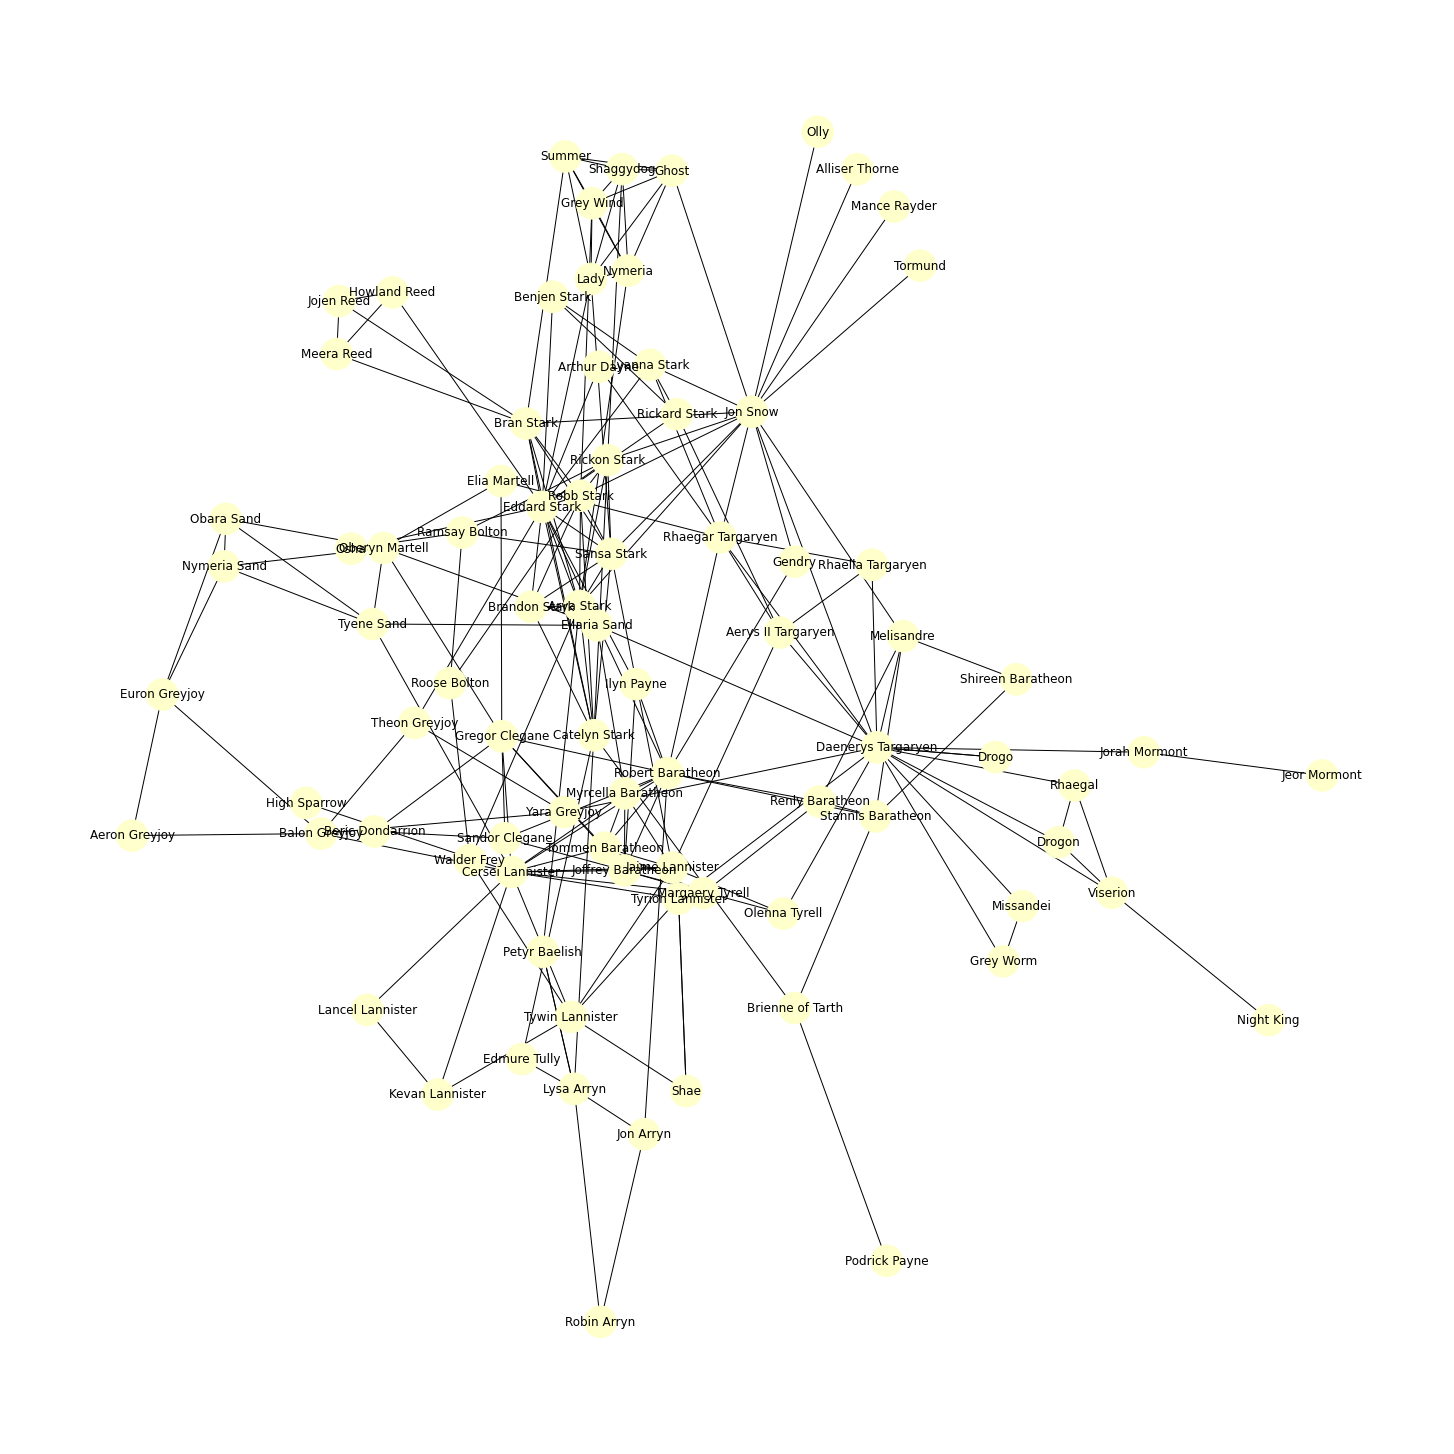

In [6]:
# LEAVE AS-IS

plot_graph(graph)

# 2. K-core decomposition

Now we will perform a k-core decomposition, using the following auxiliary functions, which you can leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [7]:
# LEAVE AS-IS

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

Complete the code for function `kcore_decomposition(g)`; to use this function, you do `node_to_kcore = kcore_decomposition(g)`.

```python
def kcore_decomposition(graph):
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(1, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            # Check if this list is empty
            if len(nodes_in_level) == 0:
                # TO-DO: implement (one line)

            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level:
                # TO-DO: implement this (two lines)

    return(node_to_level)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for "kcore_decomposition". Please remember to include enough comments to explain what your code is doing.</font>

Test your code. The following should print:

```python
K-core of Jon Snow: 6
K-core of Tyrion Lannister: 3
K-core of Night King: 1
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [12]:
# LEAVE AS-IS

node_to_kcore = kcore_decomposition(graph)

for character in ["Jon Snow", "Tyrion Lannister", "Night King"]:
    print("K-core of {:s}: {:d}".format(character, node_to_kcore[character]))

K-core of Jon Snow: 6
K-core of Tyrion Lannister: 3
K-core of Night King: 1


Now, create and draw a sub-graph named `graphcore`, containing only the nodes with k-core number greater or equal to **4**. You can use [Graph.subgraph](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html)

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with a brief commentary on this graph.</font>

# 3. Modularity of a partition

We will compute the modularity of a partitioning. First, let's draw a small toy graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

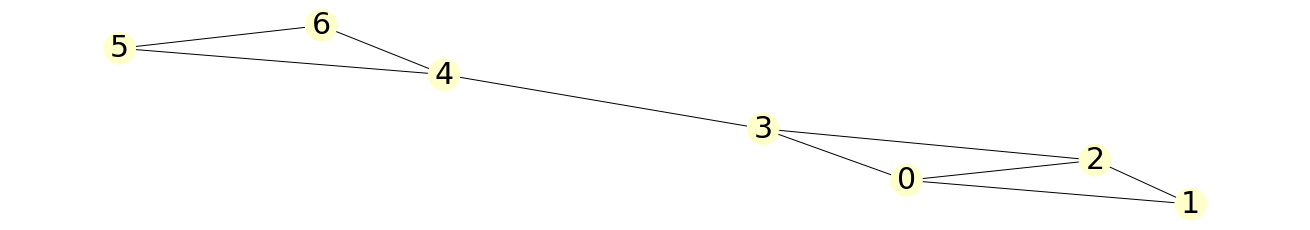

In [15]:
# Leave as-is

g = nx.Graph()

g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 0)
g.add_edge(0, 2)
g.add_edge(3, 4)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 4)

plot_graph(g, height=3, width=18, font_size=30)

A partition of a graph is represented as a list of sets. Each set represents a part of the graph. For instance, the following are two partitions. The first one is arguably the most natural way of dividing this graph: nodes 0, 1, 2, 3 belong to one partition, and nodes 4, 5, and 6 to the other partition. The second one places the node 3 in the "wrong" partition.

NetworkX has a function to compute the modularity of a partition: [community.quality.modularity](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html). It applies the formula we discussed in class:

![Modularity formula](modularity_formula.png)

Where:

* Q is the modularity
* C is a community
* L<sub>C</sub> is the number of internal links in C (internal means connecting two nodes in C)
* K<sub>C</sub> is the summation of the degree of nodes in C
* L is the total number of links in the graph

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

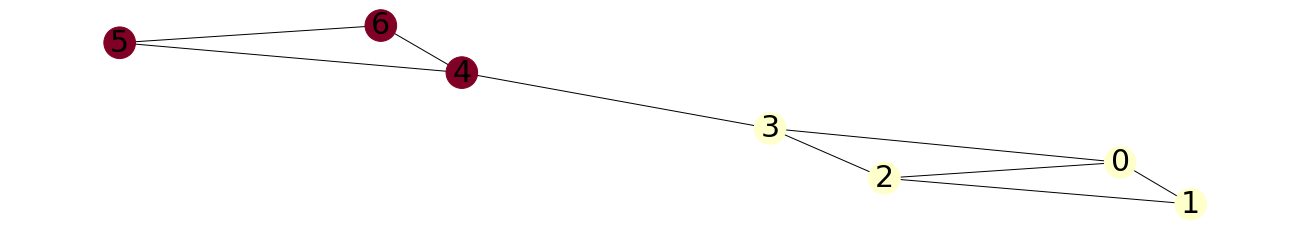

Modularity of partition 1 according to NetworkX: 0.3642


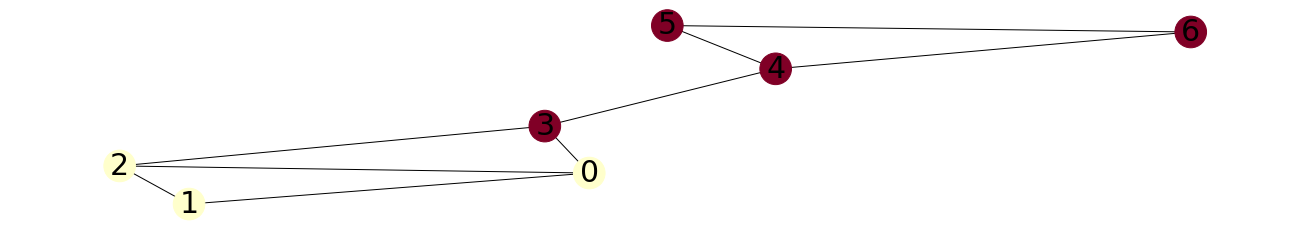

Modularity of partition 2 according to NetworkX: 0.2716


In [16]:
# LEAVE AS-IS

partition1 = [
    {0, 1, 2, 3},
    {4, 5, 6}
]
plot_graph(g, height=3, width=18, font_size=30, partition=partition1)
print("Modularity of partition 1 according to NetworkX: %.4f" % nx.community.quality.modularity(g, partition1))


partition2 = [
    {0, 1, 2},
    {3, 4, 5, 6}
]
plot_graph(g, height=3, width=18, font_size=30, partition=partition2)
print("Modularity of partition 2 according to NetworkX: %.4f" % nx.community.quality.modularity(g, partition2))

Create a function `modularity(g, partition)`. First, define two auxiliary functions:

* `Lc(g, C)`, returning the number of internal links within community C. An easy way of doing this is creating a [subgraph](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) of g restricted to the nodes in C, and then counting the [number of edges](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html) in that subgraph.
* `kc(g, C)`, returning the sumation of the degree of nodes in C in the graph g (do not create a subgraph).

Then, write the function `modularity` using these two auxiliary functions.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `Lc(g, C)`, for `kc(g, C)` and for `modularity(g, partition)`.</font>

Use the following to test your code.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [23]:
# LEAVE AS-IS

print("Modularity of partition 1: mine={:.6f}, networkx={:.6f}".format(
    modularity(g, partition1), nx.community.quality.modularity(g, partition1)))

print("Modularity of partition 2: mine={:.6f}, networkx={:.6f}".format(
    modularity(g, partition2), nx.community.quality.modularity(g, partition2)))


Modularity of partition 1: mine=0.364198, networkx=0.364198
Modularity of partition 2: mine=0.271605, networkx=0.271605


# 4. Girvan-Newman algorithm

The Girvan-Newman algorithm generates a series of partitions of a graph. The first has simply the entire graph in one partition, and the last has one partition per node.

The way in which the algorithm operates is by iteratively removing the edge with the largest edge betweenness, and returning a new partition every time the number of connected components of the graph increases.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 4.1. Find the edge with the largest betweenness

Now, write a function to find the edge with the largest betweenness in a graph.

First, use function [edge_betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html) to obtain a dictionary in which keys are edges, and values are edge betweenness.

Then, iterate through those keys and find the one with the maximum edge betweenness. Return that key.

*Tip:* the dictionary returned by ``edge_betweenness_centrality`` sometimes has triples *(u,v,0)* as keys, instead of simple tuples *(u,v)*. In that case, remember to return simply *(u,v)*. You can check how many values a tuple *t* contains by using ``len(t)``.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `largest_betweenness_edge`, using the edge_betweenness_centrality function in NetworkX</font>

In [41]:
# LEAVE AS-IS
# The answer should be pretty obvious, considering the graph

print(largest_betweenness_edge(g))

(3, 4)


## 4.2. Iteratively remove the edge with the largest betweenness

We will use the following auxiliary function, that you can leave as-is. The reason we are introducing function `list_connected_components` is convenience, as the function [connected_components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html) in NetworkX returns a [generator](https://wiki.python.org/moin/Generators) instead of a list.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [42]:
# LEAVE AS-IS

def list_connected_components(g):
    return list(nx.connected_components(g))

def number_connected_components(g):
    return len(list_connected_components(g))


Now, implement the `girvan_newman` algorithm using the following template:

```python
def girvan_newman(orig):

    # Copy the original graph
    g = orig.copy()

    # All of the nodes in a single partition is the first partition we create
    partition_sequence = [list_connected_components(g)]
    
    # Compute the current number of connected components (ncomp)
    # TO-DO complete this
    
    # While we have not arrived to a situation where each node is a singleton
    while ncomp < g.number_of_nodes():
        
        # Find an edge to remove and remove it
        # TO-DO complete this
        
        # Recompute the new number of connected components (ncomp_new)
        # TO-DO complete this
        
        # If the number of connected components has increased
        if ncomp_new > ncomp:
            
            # Add to the partition sequence the list of connected components
            # TO-DO complete this
            
            # Update the number of connected components
            ncomp = ncomp_new

    return partition_sequence
```


The output should be partition sequence, i.e., a list of partitions of the graph. In this particular case, the partition sequence looks like this:

```python
[[{0, 1, 2, 3, 4, 5, 6}],
 [{0, 1, 2, 3}, {4, 5, 6}],
 [{0, 2, 3}, {1}, {4, 5, 6}],
 ...
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}]]
```

The way to interpret this is as follows:

* The first partition is simply all nodes in a single part
* The second partition happens after removing edge (3, 4), and divides the graph into two partitions
* The third partition happens after removing edges (0, 1) and (1, 2), ...
* ...
* The last partition happens after removing all edges, and each node is a singleton

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `girvan_newman` following the template above</font>

The following cell, which you should leave as-is, runs the Girvan-Newman algorithm and prints the modularity profile.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [46]:
# LEAVE AS-IS

def run_girvan_newman(g):

    partitions = girvan_newman(g)
    modularity_profile = []    
    for partition in partitions:
        print("Partition %s" % (partition,) )
        m = modularity(g, partition)
        print("Modularity: %.4f" % m)
        modularity_profile.append(m)
        print()  
        
    plt.xlabel("Iteration")
    plt.ylabel("Modularity")
    plt.title("Modularity profile")
    plt.plot(modularity_profile)

Partition [{0, 1, 2, 3, 4, 5, 6}]
Modularity: 0.0000

Partition [{0, 1, 2, 3}, {4, 5, 6}]
Modularity: 0.3642

Partition [{0, 2, 3}, {1}, {4, 5, 6}]
Modularity: 0.2531

Partition [{0}, {1}, {2, 3}, {4, 5, 6}]
Modularity: 0.1420

Partition [{0}, {1}, {2}, {3}, {4, 5, 6}]
Modularity: 0.0864

Partition [{0}, {1}, {2}, {3}, {4}, {5, 6}]
Modularity: -0.0617

Partition [{0}, {1}, {2}, {3}, {4}, {5}, {6}]
Modularity: -0.1481



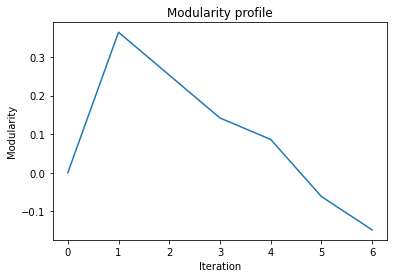

In [47]:
# LEAVE AS-IS

run_girvan_newman(g)

Partition [{'Rhaegal', 'Olly', 'Tyene Sand', 'Olenna Tyrell', 'Margaery Tyrell', 'Stannis Baratheon', 'Sandor Clegane', 'Nymeria', 'Ilyn Payne', 'Night King', 'Myrcella Baratheon', 'Obara Sand', 'Gregor Clegane', 'Shaggydog', 'Arthur Dayne', 'Aeron Greyjoy', 'Missandei', 'Walder Frey', 'Arya Stark', 'Lyanna Stark', 'Renly Baratheon', 'Balon Greyjoy', 'Drogon', 'Grey Wind', 'Lysa Arryn', 'Beric Dondarrion', 'Jaime Lannister', 'Daenerys Targaryen', 'Tommen Baratheon', 'Jorah Mormont', 'Oberyn Martell', 'Drogo', 'Rhaella Targaryen', 'Aerys II Targaryen', 'Kevan Lannister', 'Tormund', 'Howland Reed', 'Robert Baratheon', 'Tyrion Lannister', 'Viserion', 'Rickon Stark', 'Melisandre', 'Rickard Stark', 'Ellaria Sand', 'Ramsay Bolton', 'Bran Stark', 'Brienne of Tarth', 'Jojen Reed', 'Robb Stark', 'Tywin Lannister', 'Cersei Lannister', 'Benjen Stark', 'Petyr Baelish', 'Jeor Mormont', 'Edmure Tully', 'Euron Greyjoy', 'Osha', 'Robin Arryn', 'Mance Rayder', 'Eddard Stark', 'Ghost', 'Jon Snow', 'Sans

Partition [{'Tormund'}, {'Podrick Payne'}, {'Missandei'}, {'Grey Worm'}, {'Brandon Stark'}, {'Benjen Stark'}, {'Tommen Baratheon'}, {'Edmure Tully'}, {'Rhaella Targaryen'}, {'Catelyn Stark'}, {'Jojen Reed'}, {'Meera Reed'}, {'Howland Reed'}, {'Jorah Mormont'}, {'Jeor Mormont'}, {'Bran Stark'}, {'Sansa Stark'}, {'Lyanna Stark'}, {'Yara Greyjoy'}, {'Theon Greyjoy'}, {'Aeron Greyjoy'}, {'Shaggydog'}, {'Summer'}, {'Nymeria'}, {'Ghost'}, {'Grey Wind'}, {'Gendry'}, {'Drogon'}, {'Rhaegal'}, {'Robin Arryn'}, {'Margaery Tyrell'}, {'Renly Baratheon'}, {'Viserion'}, {'Night King'}, {'Jaime Lannister'}, {'Rhaegar Targaryen'}, {'Robert Baratheon'}, {'Sandor Clegane'}, {'Beric Dondarrion'}, {'Robb Stark'}, {'Rickon Stark'}, {'Rickard Stark'}, {'Aerys II Targaryen'}, {'Ilyn Payne'}, {'Shae'}, {'Tyene Sand'}, {'Obara Sand'}, {'Nymeria Sand'}, {'Mance Rayder'}, {'Osha'}, {'Oberyn Martell'}, {'Elia Martell'}, {'Gregor Clegane'}, {'Tywin Lannister'}, {'Tyrion Lannister'}, {'Lancel Lannister'}, {'Kevan La

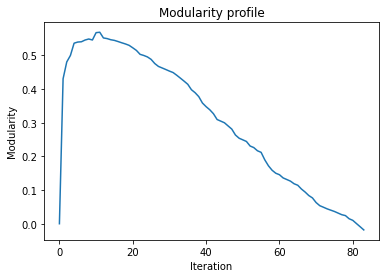

In [48]:
# LEAVE AS-IS

run_girvan_newman(graph)

Partition [{'Summer', 'Bran Stark', 'Grey Wind', 'Robb Stark', 'Jaime Lannister', 'Nymeria', 'Cersei Lannister', 'Tommen Baratheon', 'Catelyn Stark', 'Brandon Stark', 'Myrcella Baratheon', 'Lady', 'Gregor Clegane', 'Shaggydog', 'Robert Baratheon', 'Eddard Stark', 'Ghost', 'Joffrey Baratheon', 'Jon Snow', 'Rickon Stark', 'Sansa Stark', 'Arya Stark'}]
Modularity: 0.0000

Partition [{'Eddard Stark', 'Brandon Stark', 'Sansa Stark', 'Ghost', 'Nymeria', 'Lady', 'Summer', 'Jon Snow', 'Bran Stark', 'Catelyn Stark', 'Rickon Stark', 'Shaggydog', 'Grey Wind', 'Robb Stark', 'Arya Stark'}, {'Cersei Lannister', 'Myrcella Baratheon', 'Tommen Baratheon', 'Joffrey Baratheon', 'Gregor Clegane', 'Robert Baratheon', 'Jaime Lannister'}]
Modularity: 0.3713

Partition [{'Ghost', 'Nymeria', 'Lady', 'Summer', 'Shaggydog', 'Grey Wind'}, {'Eddard Stark', 'Brandon Stark', 'Sansa Stark', 'Jon Snow', 'Bran Stark', 'Catelyn Stark', 'Rickon Stark', 'Robb Stark', 'Arya Stark'}, {'Cersei Lannister', 'Myrcella Baratheon

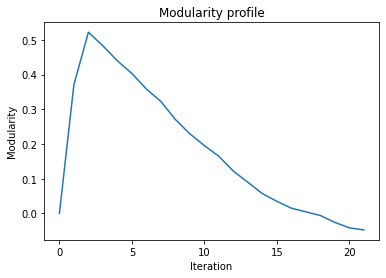

In [49]:
# LEAVE AS-IS

run_girvan_newman(graphcore)

<font size="+1" color="red">Replace this cell with a brief commentary about the modularity profiles above, and which would be the partitioning that should be chosen in each case.</font>

Create function `run_girvan_newman_modularity` that runs Girvan-Newman and returns the partition with the largest modularity.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `run_girvan_newman_modularity`.</font>

The following cell, which you can leave as-is, runs this over the entire graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [56]:
# LEAVE AS-IS

def run_and_plot(name, g):
    partition = run_girvan_newman_modularity(g)
    print("The best partition of {:s} has modularity {:.4f} and {:d} communities".format(
        name, modularity(g, partition), len(partition)))
    plot_graph(g, partition=partition)    

In [ ]:
# LEAVE AS-IS

run_and_plot("the entire graph", graph)

In [ ]:
# LEAVE AS-IS


run_and_plot("the core of the graph", graphcore)

<font size="+1" color="red">Replace this cell with a brief commentary about what you see in these two partitionings. If you see some interesting community or communities, you can look online to check if the characters in those communities are somehow related in the series. Do you see some consistencies or inconsistencies when comparing the partitioning of the core nodes only, and the partitions in which they are placed when partitioning the entire graph?</font>

# Deliver your code (individually)

A .zip file containing:

* This notebook.


## Available, extra points are

For extra points and extra learning, implement a label propagation algorithm for finding communities. This algorithm receives as input the desired number of communities and a target number of iterations. It initializes by assigning randomly each node to one of the communities. Then, for the target number of iterations, it moves every node to the community to which the majority of its neighbors belong.

**Note:** if for extra points you go, ``<font size="+2" color="blue">Additional results: additional partitioning algorithm</font>`` at the top of your notebook, you must add.

<font size="-1" color="gray">(This cell, when delivering, remove.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>